In [3]:
!pip install sentencepiece

In [4]:
import re
import random
from nltk import pos_tag, word_tokenize, bigrams, ngrams, ne_chunk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from typing import List, Dict
from random import randrange
from math import floor

import re
import torch

from transformers import T5Tokenizer, T5ForConditionalGeneration
import sentencepiece

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def dataframe_for_ngram(file_path):
    # Read the text file into a DataFrame
    columns = ['Frequency', 'Word1', 'Word2', 'Word3', 'POS1', 'POS2','POS3','POS4','POS5']
    df = pd.read_csv(file_path, delimiter='\s+', header=None, names=columns)
    return df

file_path = '/content/drive/MyDrive/DS_Project/ML-method/ngrams_words_3.txt'
df_freq_trigram = dataframe_for_ngram(file_path)

# Display the DataFrame
print(df_freq_trigram)

        Frequency   Word1 Word2      Word3   POS1  POS2  POS3 POS4 POS5
0         4849042     one    of        the    MC1    IO    AT  NaN  NaN
1         3478886       a   lot         of    AT1   NN1    IO  NaN  NaN
2         3045715      as  well         as   II31  II32  II33  NaN  NaN
3         2678127      be  able         to    VBI    JK    TO  NaN  NaN
4         2445731       I    do        n't  PPIS1   VD0    XX  NaN  NaN
...           ...     ...   ...        ...    ...   ...   ...  ...  ...
999995        742      he   was      Chief  PPHS1  VBDZ    JJ  NaN  NaN
999996        742      he   was     losing  PPHS1  VBDZ   VVG  NaN  NaN
999997        742  health  care  resources    NN1   NN1   NN2  NaN  NaN
999998        742   heart   for          a    NN1    IF   AT1  NaN  NaN
999999        742  Heaven   and        the    NN1    CC    AT  NaN  NaN

[1000000 rows x 9 columns]


<ipython-input-4-7f0dc3f214eb>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\s+', header=None, names=columns)


In [ ]:
df_freq_trigram['Trigram'] = df_freq_trigram['Word1'] + ' ' + df_freq_trigram['Word2'] + ' ' + df_freq_trigram['Word3']

# Extract the 'Combined_Words' column as a list
trigram_freq = df_freq_trigram['Trigram'].tolist()
print(trigram_freq[:10])

['one of the', 'a lot of', 'as well as', 'be able to', "I do n't", 'some of the', 'part of the', 'the end of', 'you want to', 'out of the']


In [ ]:
len(trigram_freq)

1000000

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DS_Project/msr_dataset/train_large.xlsx')

In [ ]:
for index, row in df.head(10).iterrows():
  print(row["Sentences"])

 Except for this small vocal minority, we have just not gotten a lot of groundswell against this from members,  says APA president Philip G. Zimbardo of Stanford University. ||| "Except for this small vocal minority, we have not gotten a lot of groundswell against this," says APA president Zimbardo.
Date with destiny: After Vanderbilt opens with Georgia Tech, the Commodores will play host to Furman, which is Johnson's former team and a Division I-AA powerhouse. ||| After Vanderbilt opens with Georgia Tech, the Commodores will host Furman, Johnson's former Division I-AA team. 
The court upheld the sentence of another death row inmate, Robert O. Marshall, convicted of arranging the murder of his wife at a picnic area on the Garden State Parkway. ||| The court upheld the death sentence of Robert O. Marshal, convicted of arranging the murder of his wife.
He said companies engaged in e-commerce would be able to set up offices, employ staff and own equipment in the open zone, including fully

In [ ]:
# Function to process a single entry in the column
def process_text(text):
    # Remove punctuation and "next line" characters
    processed_text = re.sub(r'[^\w\s]', '', text.replace('\|\|\|', ''))
    processed_text = ' '.join(processed_text.split())

    return processed_text

# Apply the processing function to the entire column
df['Sentences'] = df['Sentences'].apply(process_text)

# Display the processed DataFrame
print(df.loc[0, "Sentences"])

Except for this small vocal minority we have just not gotten a lot of groundswell against this from members says APA president Philip G Zimbardo of Stanford University Except for this small vocal minority we have not gotten a lot of groundswell against this says APA president Zimbardo


In [ ]:
def extract_trigrams(df):
    def clean_and_tokenize(sentence):
        tokens = word_tokenize(sentence)
        cleaned_tokens = [word.strip(string.punctuation) for word in tokens if word.strip(string.punctuation)]
        return cleaned_tokens

    def extract_trigrams_from_tokens(tokens):
        trigram_list = list(ngrams(tokens, 3))
        return [' '.join(map(str, trigram)) for trigram in trigram_list]

    # Create a new column to store the extracted trigrams
    df['Trigrams'] = None

    # Extract trigrams from each row in the DataFrame
    for index, row in df.iterrows():
        sentence = row['Sentences']
        tokens = clean_and_tokenize(sentence)
        trigrams_in_sentence = extract_trigrams_from_tokens(tokens)

        # Set the 'trigrams' column value for the current row
        df.at[index, 'Trigrams'] = trigrams_in_sentence

    return df

trigram_df = extract_trigrams(df)
trigram_df["Trigrams"]

0       [Except for this, for this small, this small v...
1       [Date with destiny, with destiny After, destin...
2       [The court upheld, court upheld the, upheld th...
3       [He said companies, said companies engaged, co...
4       [Sheikh Mohamed who, Mohamed who is, who is al...
                              ...                        
4931    [Take a few, a few moments, few moments to, mo...
4932    [At that same, that same time, same time Ameri...
4933    [There is considerable, is considerable eviden...
4934    [Under what conditions, what conditions are, c...
4935    [Brown praised the, praised the recommendation...
Name: Trigrams, Length: 4936, dtype: object

In [ ]:
trigram_df.loc[1, "Trigrams"]

['Date with destiny',
 'with destiny After',
 'destiny After Vanderbilt',
 'After Vanderbilt opens',
 'Vanderbilt opens with',
 'opens with Georgia',
 'with Georgia Tech',
 'Georgia Tech the',
 'Tech the Commodores',
 'the Commodores will',
 'Commodores will play',
 'will play host',
 'play host to',
 'host to Furman',
 'to Furman which',
 'Furman which is',
 'which is Johnsons',
 'is Johnsons former',
 'Johnsons former team',
 'former team and',
 'team and a',
 'and a Division',
 'a Division IAA',
 'Division IAA powerhouse',
 'IAA powerhouse After',
 'powerhouse After Vanderbilt',
 'After Vanderbilt opens',
 'Vanderbilt opens with',
 'opens with Georgia',
 'with Georgia Tech',
 'Georgia Tech the',
 'Tech the Commodores',
 'the Commodores will',
 'Commodores will host',
 'will host Furman',
 'host Furman Johnsons',
 'Furman Johnsons former',
 'Johnsons former Division',
 'former Division IAA',
 'Division IAA team']

In [ ]:
def replace_trigram_1(df, top_freq):
    for index, row in df.iterrows():
        text = row['Sentences']
        trigrams = row['Trigrams']

        if trigrams:
            # Tokenize the text and perform part-of-speech tagging
            tokens = word_tokenize(text)
            tagged_tokens = pos_tag(tokens)

            # Use nltk's named entity recognition
            named_entities = nltk.ne_chunk(tagged_tokens)

            # Get named entities from named entity chunks
            named_entity_list = []
            for entity in named_entities:
                if isinstance(entity, nltk.Tree):
                    entity_name = " ".join([word for word, tag in entity.leaves()])
                    named_entity_list.append(entity_name)

            # Choose a random index to replace with "BLANKBLANK"
            index_to_replace = random.randint(0, len(trigrams) - 1)
            chosen_trigram = trigrams[index_to_replace]

            # Check if the chosen trigram is in the "top 2000" list or is a named entity
            while chosen_trigram in top_freq or chosen_trigram in named_entity_list:
                index_to_replace = random.randint(0, len(trigrams) - 1)
                chosen_trigram = trigrams[index_to_replace]

            # Replace the chosen trigram with "BLANKBLANK"
            trigrams[index_to_replace] = "<<BLANK>> <<BLANK>> <<BLANK>>"

        # Update the 'trigrams' column in the DataFrame
        df.at[index, 'Trigrams'] = trigrams

    return df


In [ ]:
df = replace_trigram_1(trigram_df, trigram_freq[:8000])

df["Trigrams"]

0       [Except for this, for this small, this small v...
1       [Date with destiny, with destiny After, destin...
2       [<<BLANK>> <<BLANK>> <<BLANK>>, court upheld t...
3       [He said companies, said companies engaged, co...
4       [Sheikh Mohamed who, Mohamed who is, who is al...
                              ...                        
4931    [Take a few, a few moments, few moments to, mo...
4932    [At that same, that same time, same time Ameri...
4933    [There is considerable, is considerable eviden...
4934    [Under what conditions, what conditions are, c...
4935    [Brown praised the, praised the recommendation...
Name: Trigrams, Length: 4936, dtype: object

In [ ]:
df['Blanked_Sentence'] = ''
for index, row in df.iterrows():
    sentence_parts = []
    for i in range(len(row['Trigrams'])):
        if row['Trigrams'][i] == '<<BLANK>> <<BLANK>> <<BLANK>>':
            # If it's the first trigram, append as is. Otherwise, remove the previous word.
            if i == 0:
                sentence_parts.append('<<BLANK>> <<BLANK>> <<BLANK>>')
            else:
                words = row['Trigrams'][i-1].split()
                if len(words) > 2:
                    sentence_parts.pop()  # Remove the last word
                    sentence_parts.pop()  # Remove the second last word
                sentence_parts.append('<<BLANK>> <<BLANK>> <<BLANK>>')
        else:
            words = row['Trigrams'][i].split()
            if i > 0:
                words = words[2:]
            sentence_parts.extend(words)

    sentence = ' '.join(sentence_parts)
    df.at[index, 'Blanked_Sentence'] = sentence


In [ ]:
df.loc[1,"Blanked_Sentence"]

'Date with destiny After Vanderbilt opens with Georgia Tech <<BLANK>> <<BLANK>> <<BLANK>> play host to Furman which is Johnsons former team and a Division IAA powerhouse After Vanderbilt opens with Georgia Tech the Commodores will host Furman Johnsons former Division IAA team'

In [ ]:
model_name = "t5-large"
tokenizer = T5Tokenizer.from_pretrained("google-t5/t5-large")
model = T5ForConditionalGeneration.from_pretrained('google/t5-large')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
torch.cuda.empty_cache()

In [ ]:
model = model.to("cuda")

In [ ]:
def _model_guess_word(sentence: str) -> List[str]:
    blank_sentence = re.sub('<<BLANK>> <<BLANK>> <<BLANK>>', '<extra_id_0>', sentence)
    tokens = tokenizer(blank_sentence, return_tensors="pt").to(device)
    toklen = tokens['input_ids'].size()[1]
    if toklen > 512:
        tokens['input_ids'] = torch.narrow(tokens['input_ids'], 1, 0, 512)
        tokens['attention_mask'] = torch.narrow(tokens['attention_mask'], 1, 0, 512)
        toklen = tokens['input_ids'].size()[1]
    out = model.generate(**tokens, return_dict_in_generate=True, num_beams=15, output_scores=False,
                        num_return_sequences=11, min_new_tokens=3, max_new_tokens=4,
                        eos_token_id=tokenizer.convert_tokens_to_ids('<extra_id_1>'))
    results = tokenizer.batch_decode(out.sequences, skip_special_tokens=True)
    words = [re.sub(r'\s*<extra_id_[0-9]+>\s*', '', r) for r in results]
    return words

In [ ]:
test = _model_guess_word("this is a long sentence, we just <<BLANK>> <<BLANK>> <<BLANK>> this sentence to see if it means something or not")
print(test)

['have to look', 'want to look', 'want to see', 'need to look', 'have to wait', 'want to read', 'want to check', 'need to read', 'have to read', 'want to use', 'want to try']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1210: UserWarning: Unfeasible length constraints: `min_new_tokens` (53), when added to the prompt length (1), is larger than the maximum possible length (5). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length. Note that `max_length` is set to 5, its default value.
  warnings.warn(


In [ ]:
# Apply the function to each row of the 'blanked_sentence' column
df['guessed_words'] = df['Blanked_Sentence'].apply(_model_guess_word)

In [ ]:
# Function to replace placeholders in a sentence with guessed words
def replace_blank(sentence, guessed_words):
    return sentence.replace('<<BLANK>> <<BLANK>> <<BLANK>>', ''.join(guessed_words), 1)

# Create new columns for each guessed word
for i in range(1, 12):
    column_name = f'Guessed_Sentence_{i}'
    df[column_name] = df.apply(lambda row: replace_blank(row['Blanked_Sentence'], row['guessed_words'][i-1]), axis=1)

In [ ]:
# Function to compare guessed sentence with ground truth
def compare_sentences(guessed_sentence, ground_truth):
    return guessed_sentence == ground_truth

# Function to evaluate guessed results
def evaluate_guessed_results(row):
    for i in range(1, 12):
        column_name = f'Guessed_Sentence_{i}'
        if compare_sentences(row[column_name], row['Sentences']):
            return column_name[-1:]
    return None

# Apply the evaluation function to each row and store the result in a new column
df['Guessed_Position'] = df.apply(evaluate_guessed_results, axis=1)

In [ ]:
print(df.loc[1, "Guessed_Position"])

None


In [ ]:
df["Guessed_Position"]

0       None
1       None
2          6
3          1
4       None
        ... 
4931       5
4932    None
4933    None
4934    None
4935       1
Name: Guessed_Position, Length: 4936, dtype: object

In [ ]:
filtered_df = df[df["Guessed_Position"].notnull()] #get all the rows that have at least one correct guess

In [ ]:
filtered_df

Sentences  \
2     The court upheld the sentence of another death...   
3     He said companies engaged in ecommerce would b...   
5     Taking a cue from California more politicians ...   
6     The APA has scheduled 30 minutes at its meetin...   
8     But a senior State Department official also ac...   
...                                                 ...   
4920  Excessive alcohol consumption plays an importa...   
4923  One port of call for both Gondola and the othe...   
4928  The ancient Israelites would spend forty years...   
4931  Take a few moments to list ﬁve or six competen...   
4935  Brown praised the recommendation for addressin...   

                                               Trigrams  \
2     [<<BLANK>> <<BLANK>> <<BLANK>>, court upheld t...   
3     [He said companies, said companies engaged, co...   
5     [Taking a cue, a cue from, cue from California...   
6     [The APA has, APA has scheduled, has scheduled...   
8     [But a senior, a senior State, senior State De...   
...                                                 ...   
4920  [Excessive alcohol consumption, alcohol consum...   
4923  [One port of, port of call, of call for, call ...   
4928  [The ancient Israelites, ancient Israelites wo...   
4931  [Take a few, a few moments, few moments to, mo...   
4935  [Brown praised the, praised the recommendation...   

                                       Blanked_Sentence  \
2     <<BLANK>> <<BLANK>> <<BLANK>> the sentence of ...   
3     He said companies engaged in ecommerce would b...   
5     Taking a cue from California more politicians ...   
6     The APA has scheduled 30 minutes at its meetin...   
8     But a senior State Department official also ac...   
...                                                 ...   
4920  Excessive alcohol consumption plays an importa...   
4923  One port of call for both Gondola and the othe...   
4928  The ancient Israelites would spend forty years...   
4931  Take a few moments to list ﬁve or six competen...   
4935  Brown praised the recommendation for addressin...   

                                          guessed_words  \
2     [ofof, the death of, ofThe court, the death se...   
3     [equipment in the, equipment inequipment, equi...   
5     [more politicians, politiciansmore, that more ...   
6     [its meeting in August, its August meeting for...   
8     [are pushing for, were pushing for, have pushe...   
...                                                 ...   
4920  [Studies haveStudies, Studies havestudies, Stu...   
4923  [and reformer John, reformer John, Reformer Jo...   
4928  [would spend for, spent forty, were forty, spe...   
4931  [child If you, children If you, benefit If you...   
4935  [in the clinical, in a c, within the c, in the...   

                                     Guessed_Sentence_1  \
2     ofof the sentence of another death row inmate ...   
3     He said companies engaged in ecommerce would b...   
5     Taking a cue from California more politicians ...   
6     The APA has scheduled 30 minutes at its meetin...   
8     But a senior State Department official also ac...   
...                                                 ...   
4920  Excessive alcohol consumption plays an importa...   
4923  One port of call for both Gondola and the othe...   
4928  The ancient Israelites would spend forty years...   
4931  Take a few moments to list ﬁve or six competen...   
4935  Brown praised the recommendation for addressin...   

                                     Guessed_Sentence_2  \
2     the death of the sentence of another death row...   
3     He said companies engaged in ecommerce would b...   
5     Taking a cue from California more politicians ...   
6     The APA has scheduled 30 minutes at its meetin...   
8     But a senior State Department official also ac...   
...                                                 ...   
4920  Excessive alcohol consumption plays an importa...   
4923  One port of call for bo

In [ ]:
print(filtered_df["Guessed_Position"])

2       6
3       1
5       3
6       3
8       1
       ..
4920    7
4923    1
4928    1
4931    5
4935    1
Name: Guessed_Position, Length: 2259, dtype: object


In [ ]:
# Calculate frequencies
value_counts = filtered_df['Guessed_Position'].value_counts()

# Sort values and frequencies
sorted_values = value_counts.index
sorted_frequencies = value_counts.values

# Plot the histogram
plt.bar(sorted_values, sorted_frequencies, color='skyblue')
plt.title('The position of correctly gussed trigram from mT5')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()


In [ ]:
def get_guessed_sentence(row):
    guessed_position = row['Guessed_Position']
    guessed_words_column = row['guessed_words']

    if 0 <= int(guessed_position):
        # Return the word at the specified position
        return guessed_words_column[int(guessed_position)-1]
    else:
        # Return a default value or handle the out-of-bounds case as needed
        return None

filtered_df['Guessed_Trigram'] = ""
filtered_df['Guessed_Trigram'] = filtered_df.apply(get_guessed_sentence, axis=1)

<ipython-input-37-79e8df7eebdd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Guessed_Trigram'] = ""
<ipython-input-37-79e8df7eebdd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Guessed_Trigram'] = filtered_df.apply(get_guessed_sentence, axis=1)


In [ ]:
pd.set_option('display.max_colwidth', None)
print(filtered_df['Guessed_Trigram'])

2            The court upheld
3            equipment in the
5       that more politicians
6             its meeting for
8             are pushing for
                ...          
4920        Many studies have
4923        and reformer John
4928          would spend for
4931             child if you
4935          in the clinical
Name: Guessed_Trigram, Length: 2259, dtype: object


In [ ]:
# Function to analyze POS tags of trigrams
def analyze_pos_tags(trigram):
    # Tokenize the trigram using NLTK
    tokens = word_tokenize(trigram)

    # Extract POS tags for each token in the trigram
    pos_tags = pos_tag(tokens)

    # Extract only the POS tags, discarding the actual words
    pos_tags = [tag for _, tag in pos_tags]

    return pos_tags

# Apply the function to the 'Trigrams' column
filtered_df['POS_Tags'] = filtered_df['Guessed_Trigram'].apply(analyze_pos_tags)

# Display the DataFrame with POS tags
print(filtered_df['POS_Tags'])

2        [DT, NN, VBD]
3         [NN, IN, DT]
5       [IN, JJR, NNS]
6       [PRP$, NN, IN]
8       [VBP, VBG, IN]
             ...      
4920    [JJ, NNS, VBP]
4923     [CC, NN, NNP]
4928      [MD, VB, IN]
4931     [NN, IN, PRP]
4935      [IN, DT, JJ]
Name: POS_Tags, Length: 2259, dtype: object


<ipython-input-39-a2254f5237ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['POS_Tags'] = filtered_df['Guessed_Trigram'].apply(analyze_pos_tags)


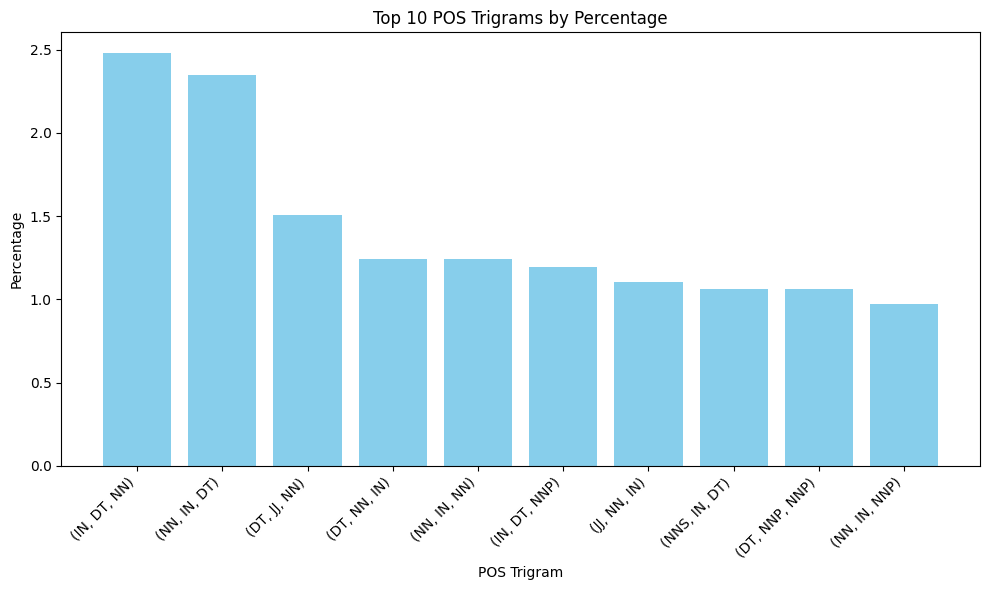

In [ ]:
# Create trigrams from the list of POS tags
all_trigrams = [tuple(combination) for sublist in filtered_df['POS_Tags'] for combination in combinations(sublist, 3)]

# Count the frequency of each trigram
trigram_counter = Counter(all_trigrams)

# Calculate the total number of trigrams
total_trigrams = len(all_trigrams)

# Calculate the percentage for each trigram
trigram_percentage = {trigram: (count / total_trigrams) * 100 for trigram, count in trigram_counter.items()}

# Get the top 10 trigrams by percentage
top_10_trigrams = dict(sorted(trigram_percentage.items(), key=lambda item: item[1], reverse=True)[:10])

# Create a DataFrame for the top 10 trigrams
top_10_df = pd.DataFrame(list(top_10_trigrams.items()), columns=['POS_Trigram', 'Percentage'])

# Convert the tuples to strings for plotting
top_10_df['POS_Trigram'] = top_10_df['POS_Trigram'].apply(lambda x: f'({x[0]}, {x[1]}, {x[2]})')

# Plot the top 10 trigrams by percentage
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['POS_Trigram'], top_10_df['Percentage'], color='skyblue')
plt.xlabel('POS Trigram')
plt.ylabel('Percentage')
plt.title('Top 10 POS Trigrams by Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()